In [1]:
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# Import the necessary python libraries
import pandas as pd
import keras
import h5py
import scipy
import numpy as np
import keras.optimizers as Optimizers
import random 
import csv
import time
import math
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sympy import * 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation  
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras.wrappers.scikit_learn import KerasRegressor
from random import randint
from sys import argv
from scipy import ndimage
from keras import backend as K
from keras.utils import to_categorical
from keras.models import load_model, Model
from IPython.display import clear_output
from keras.callbacks import History, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from decimal import Decimal

# Import the header files
import sys
sys.path.insert(0, '../../functions')
import transformations as trans
import vigir_ik_learning as vik
import each_ann, all_ann

15000 samples represented: 


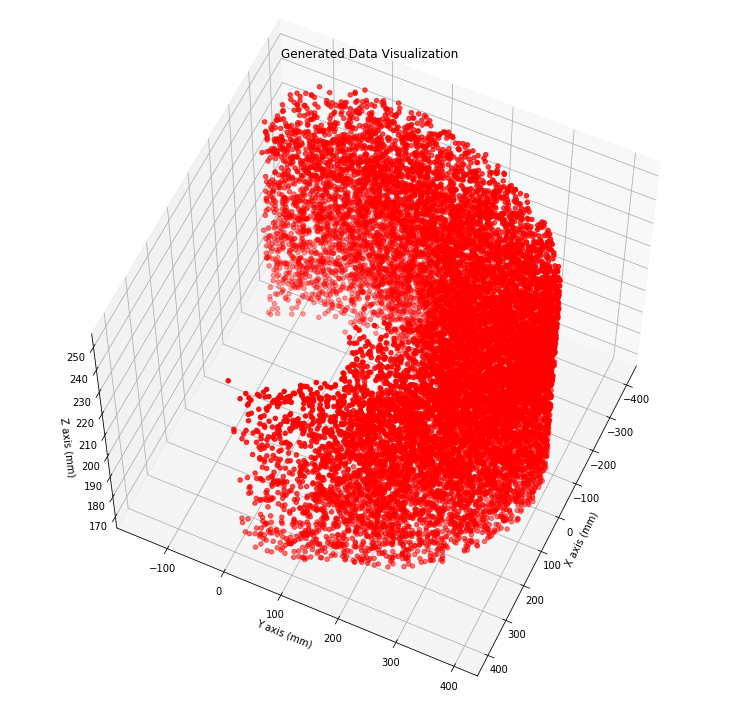

In [5]:
# Plot the dataset as you read it
data_curve = pd.read_csv('data_4DoF_Quat.csv')
data_curve = np.array(data_curve)
print('%s samples represented: ' % len(data_curve))

# Extract X, Y, Z
X = data_curve[:,0]*1000
Y = data_curve[:,1]*1000
Z = data_curve[:,2]*1000

fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection='3d')

ax.scatter(X, Y, Z, c='r', marker='o')

ax.set_xlabel('X axis (mm)')
ax.set_ylabel('Y axis (mm)')
ax.set_zlabel('Z axis (mm)')

ax.view_init(60, 25)

plt.title('Generated Data Visualization')

# save the  figure
plt.savefig("4DoF_dataset.png", dpi=150, bbox_inches='tight', pad_inches=0.0)

plt.show()

1500 samples represented: 


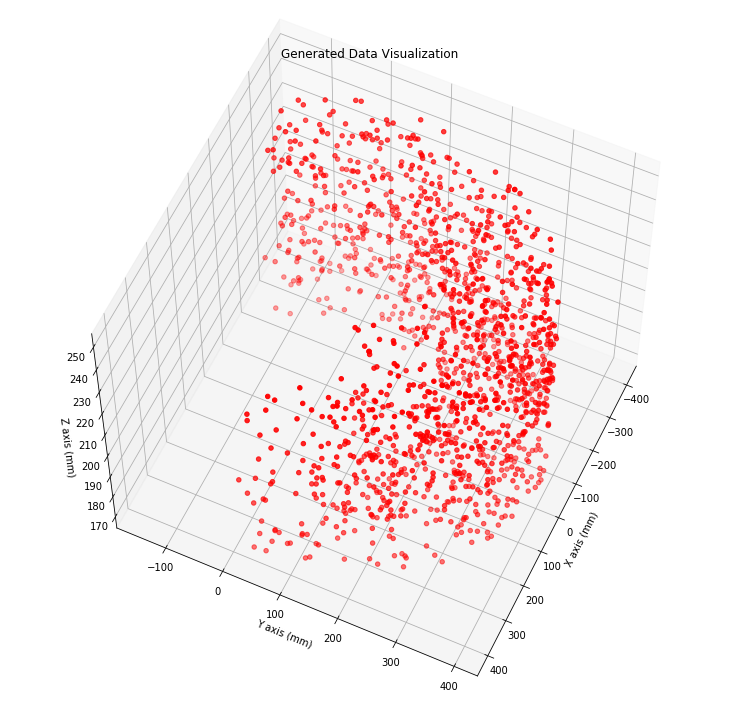

In [30]:
# Plot the dataset as you read it
data_curve = pd.read_csv('data_test_4DoF_RPY.csv')
data_curve = np.array(data_curve)
print('%s samples represented: ' % len(data_curve))

# Extract X, Y, Z
X = data_curve[:,0]*1000
Y = data_curve[:,1]*1000
Z = data_curve[:,2]*1000

fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection='3d')

ax.scatter(X, Y, Z, c='r', marker='o')

ax.set_xlabel('X axis (mm)')
ax.set_ylabel('Y axis (mm)')
ax.set_zlabel('Z axis (mm)')

ax.view_init(60, 25)

plt.title('Generated Data Visualization')

# save the  figure
plt.savefig("4DoF_dataset_Test.pdf", dpi=150, bbox_inches='tight', pad_inches=0.0)

plt.show()

In [6]:
# Load dataset
data_points_Quat = pd.read_csv('data_4DoF_Quat.csv')
data_points_RPY = pd.read_csv('data_4DoF_RPY.csv')

# Apply dataset_splitter function
train_Quat, validate_Quat, test_Quat, train_RPY, validate_RPY, test_RPY = vik.dataset_splitter_2(data_points_Quat, data_points_RPY)

data_train = np.array(train_Quat)
data_validate = np.array(validate_Quat)
data_test = np.array(test_Quat)

data_train_RPY = np.array(train_RPY)
data_validate_RPY = np.array(validate_RPY)
data_test_RPY = np.array(test_RPY) 

print('size of training data', np.shape(data_train))
print('size of validation data', np.shape(data_validate))
print('size of testing data', np.shape(data_test))

# For Quat dataset
# Into inputs
X_train = data_train[:, :7]
X_validate = data_validate[:, :7]
X_test = data_test[:, :7]


# Into outputs
Y_train = data_train[:, 7:]
Y_validate = data_validate[:, 7:]
Y_test = data_test[:, 7:]


# Save the different sets
train_filepath_Quat = '../../Non_random_all/data_conf/data_train_4DoF_Quat.csv'
val_filepath_Quat = '../../Non_random_all/data_conf/data_validate_4DoF_Quat.csv'
test_filepath_Quat = '../../Non_random_all/data_conf/data_test_4DoF_Quat.csv'
headers_Quat = ['X', 'Y', 'Z', 'q_1_x', 'q_2_y', 'q_3_z', 'q_0_w', 'Theta1', 'Theta2', 'Theta3', 'Theta4']

vik.save_trainvaltest_sets(data_train, data_validate, data_test, train_filepath_Quat, val_filepath_Quat, test_filepath_Quat, headers_Quat)


X_train_RPY = data_train_RPY[:, :7]
X_validate_RPY = data_validate_RPY[:, :7]
X_test_RPY = data_test_RPY[:, :7]


# Into outputs
Y_train_RPY = data_train_RPY[:, 7:]
Y_validate_RPY = data_validate_RPY[:, 7:]
Y_test_RPY = data_test_RPY[:, 7:]


# Save the different sets
train_filepath_RPY = '../../Non_random_all/data_conf/data_train_4DoF_RPY.csv'
val_filepath_RPY = '../../Non_random_all/data_conf/data_validate_4DoF_RPY.csv'
test_filepath_RPY = '../../Non_random_all/data_conf/data_test_4DoF_RPY.csv'
headers_RPY = ['X', 'Y', 'Z', 'roll', 'pitch', 'yaw', 'Theta1', 'Theta2', 'Theta3', 'Theta4']

vik.save_trainvaltest_sets(data_train_RPY, data_validate_RPY, data_test_RPY,train_filepath_RPY, val_filepath_RPY, test_filepath_RPY, headers_RPY)

size of training data (12000, 11)
size of validation data (1500, 11)
size of testing data (1500, 11)


In [5]:
# Load the dataset
data_train = np.array(pd.read_csv('data_train_4DoF_Quat.csv'))
data_validate = np.array(pd.read_csv('data_validate_4DoF_Quat.csv'))
data_test = np.array(pd.read_csv('data_test_4DoF_Quat.csv'))

print('size of training data', np.shape(data_train))
print('size of validation data', np.shape(data_validate))
print('size of testing data', np.shape(data_test))

# Split the dataset in 80% training / 10 % testing / 10 % testing
# into inputs
X_train = data_train[:, :7]
X_validate = data_validate[:, :7]
X_test = data_test[:, :7]

# into outputs
Y_train = data_train[:, 7:]
Y_validate = data_validate[:, 7:]
Y_test = data_test[:, 7:]

Y_train[:,2] = Y_train[:,2] * 10
Y_validate[:,2] = Y_validate[:,2] * 10
Y_test[:,2] = Y_test[:,2] * 10

print('\nY_train looks like:\n', Y_train)

size of training data (12000, 11)
size of validation data (1500, 11)
size of testing data (1500, 11)

Y_train looks like:
 [[2.50512615 1.40472483 0.63509971 1.06769542]
 [1.01045688 1.24497544 0.52207192 0.84409469]
 [2.19359092 0.61368763 0.1153015  1.35196338]
 ...
 [2.51504212 1.17982814 0.6626257  0.95875575]
 [2.8032178  1.22301304 0.01149602 0.39003753]
 [1.50698419 2.01458824 0.74419579 0.63091862]]


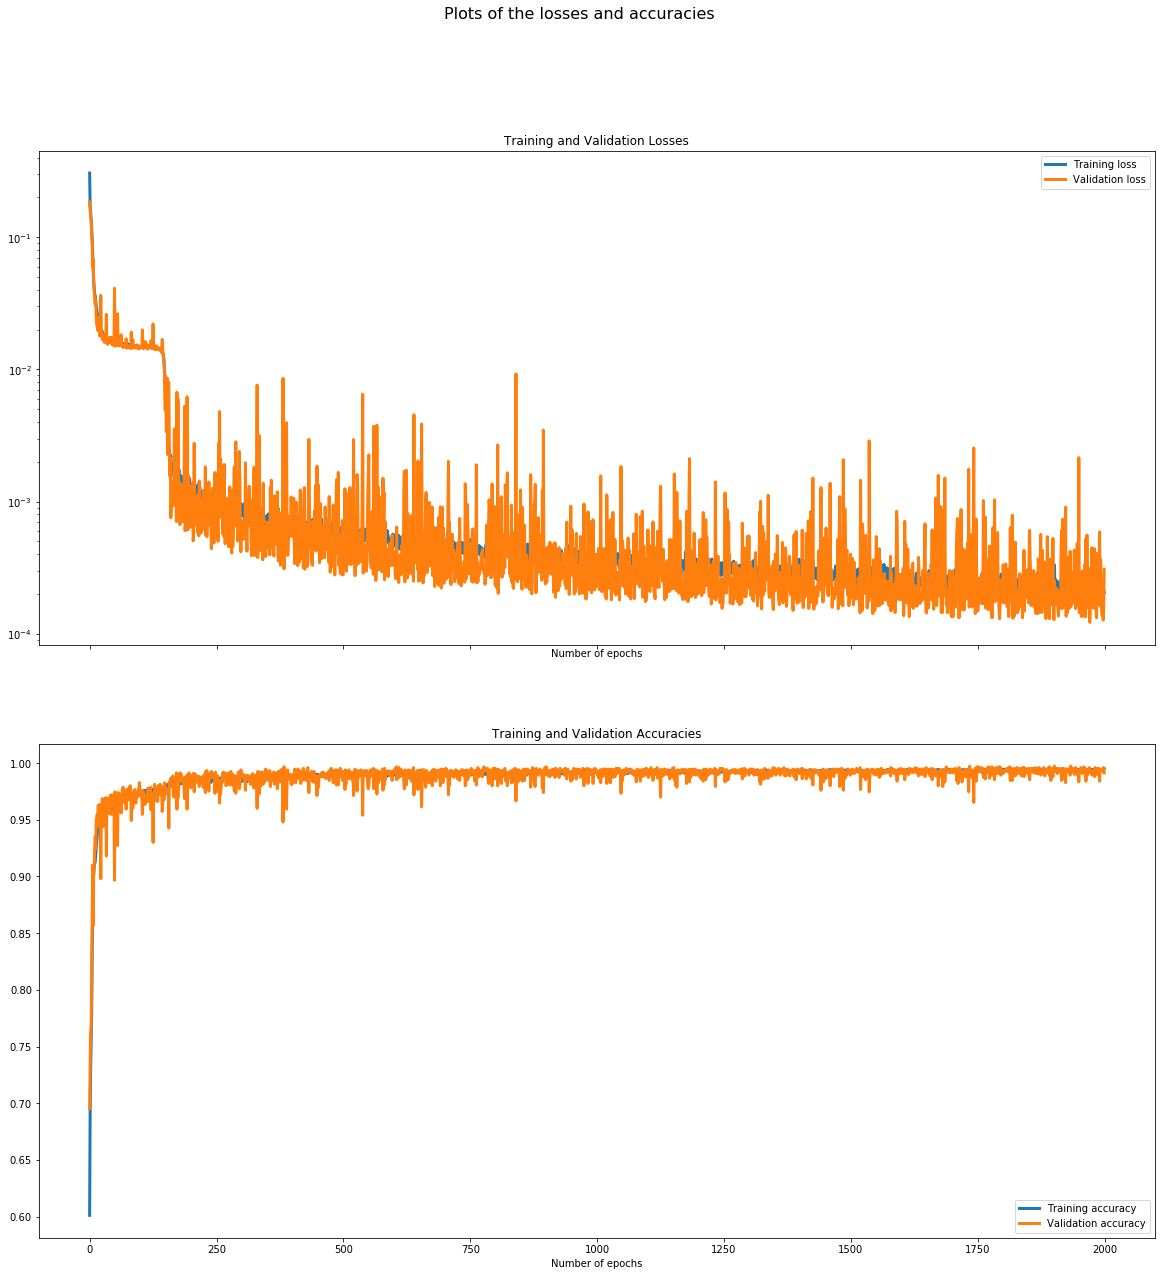

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 132       
Total params: 14,948
Trainable params: 14,948
Non-trainable params: 0
_________________________________________________________________

Result of the predictions (1500, 4)
[[2.442739   1.523923   0.5342146  0.06508827]
 [0.33998442 0.07171029 0.31742173 0.22424138]
 [1.963

In [6]:
# Train neural network
training = KerasRegressor(build_fn=vik.all_ann, batch_size=20)
checkpoint = ModelCheckpoint("weights_4DoF_all.h5", save_best_only=True, save_weights_only=True)
callbacks_list = [vik.plot_losses, checkpoint]
history_01 = training.fit(X_train, Y_train, epochs=2000, validation_data=(X_validate, Y_validate), callbacks=callbacks_list, verbose=2, shuffle=True)

# Test neural network
trained_network = vik.all_ann()
trained_network.load_weights("weights_4DoF_all.h5")
result = trained_network.predict(X_test)
print('\nResult of the predictions', result.shape)
print(result)

# Compute the mean squared error between the prediction (result), the desired (Y_test))
score = mean_squared_error(Y_test, result)
print('\nMSE predicted versus and result: %s\n' % score)

# Save history
vik.save_training_history(history_01)

K.clear_session()

# Save test predicted or result as csv files to be plotted in matlab
headers = ['Theta1', 'Theta2', 'd3', 'Theta4']

with open('Predicted_4DoF_all.csv', "w") as outcsv_1:
    writer = csv.writer(outcsv_1, lineterminator='\n')
    writer.writerow([g for g in headers])
    writer.writerows(result)
    
# Save test desired as csv files to be plotted in matlab
with open('Testing_4DoF_all.csv', "w") as outcsv_2:
    writer = csv.writer(outcsv_2, lineterminator='\n')
    writer.writerow([g for g in headers])
    writer.writerows(Y_test)

In [8]:
# Test neural network
trained_network = vik.all_ann()
trained_network.load_weights("weights_4DoF_all.h5")
result = trained_network.predict(X_test)
print('\nResult of the predictions', result.shape)
print(result)

# Compute the mean squared error between the prediction (result), the desired (Y_test))
score = mean_squared_error(Y_test, result)
print('\nMSE predicted versus and result: %s\n' % score)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 132       
Total params: 14,948
Trainable params: 14,948
Non-trainable params: 0
_________________________________________________________________

Result of the predictions (1500, 4)
[[2.442739   1.523923   0.5342146  0.06508827]
 [0.33998442 0.07171029 0.31742173 0.22424138]
 [1.963

In [9]:
# Load the predicted and desired test points for analysis
predicted = np.array(pd.read_csv('Predicted_4DoF_all.csv'))
desired = np.array(pd.read_csv('Testing_4DoF_all.csv'))
print('Predicted samples shape: ', predicted.shape)
print('Desired samples shape: ', desired.shape)

# Overview to chect the values
predicted = np.round(predicted, decimals=5)
desired = np.round(desired, decimals=5)
print('-----------------------------------------')
print(predicted)
print('-----------------------------------------')
print(desired)

Predicted samples shape:  (1500, 4)
Desired samples shape:  (1500, 4)
-----------------------------------------
[[2.44274 1.52392 0.53421 0.06509]
 [0.33998 0.07171 0.31742 0.22424]
 [1.9637  0.59026 0.00609 0.2852 ]
 ...
 [0.30914 0.43867 0.638   0.74807]
 [0.42391 1.65336 0.35233 1.00434]
 [2.61315 1.6969  0.41656 0.68936]]
-----------------------------------------
[[2.43884 1.53434 0.53555 0.0727 ]
 [0.35926 0.03354 0.31692 0.19879]
 [1.966   0.59072 0.00684 0.2869 ]
 ...
 [0.30836 0.42999 0.637   0.74695]
 [0.42707 1.64766 0.35609 1.00986]
 [2.61254 1.69389 0.41309 0.68999]]


Text(0, 0.5, 'Values of theta 4')

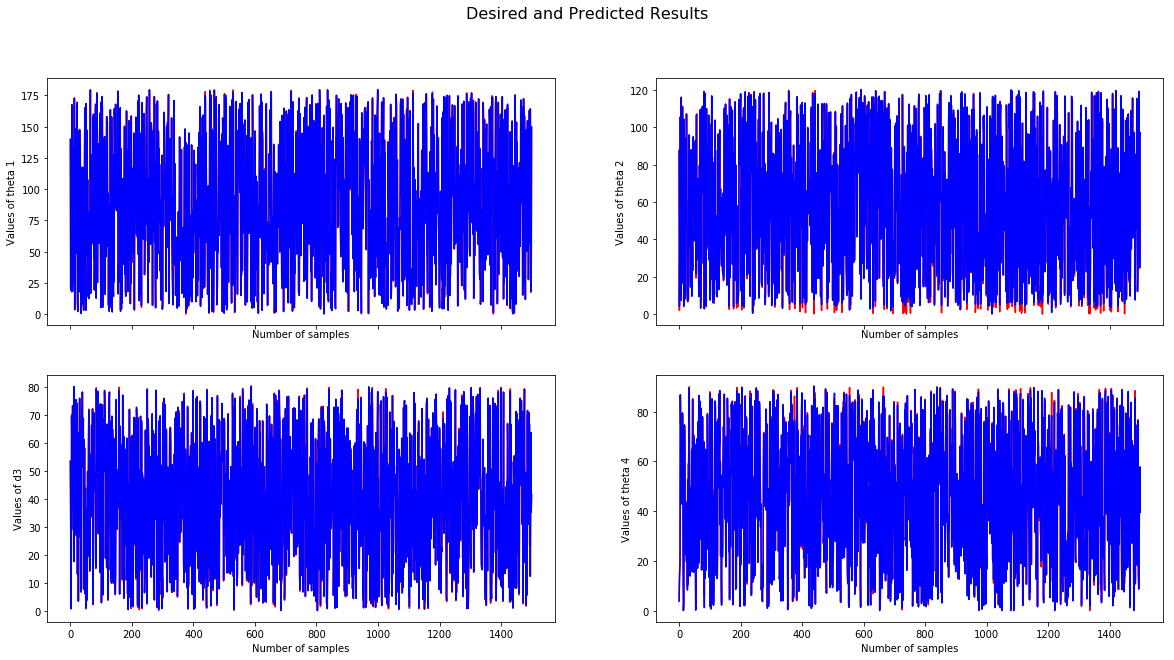

In [10]:
# Plot the test values and the predicted values
# Convert degrees-radians
deg2rad = np.pi/180.0
rad2deg = 180.0/np.pi

# Down plotting 2 figures on the same
f, axes = plt.subplots(2, 2, figsize=(20,10), sharex=True)
f.suptitle("Desired and Predicted Results", fontsize=16)

# plots for theta 1
axes[0, 0].plot(desired[:,0]*rad2deg, 'r', label="Desired")
axes[0, 0].plot(predicted[:,0]*rad2deg, 'b', label="Predicted")
#axes[0, 0].set_title("theta 1")
axes[0, 0].set_xlabel('Number of samples')
axes[0, 0].set_ylabel('Values of theta 1')

# plots for theta 2
axes[0, 1].plot(desired[:,1]*rad2deg, 'r', label="Desired")
axes[0, 1].plot(predicted[:,1]*rad2deg, 'b', label="Predicted")
#axes[0, 1].set_title("theta 2")
axes[0, 1].set_xlabel('Number of samples')
axes[0, 1].set_ylabel('Values of theta 2')

# plots for d3
axes[1, 0].plot(desired[:,2]*100, 'r', label="Desired")
axes[1, 0].plot(predicted[:,2]*100, 'b', label="Predicted")
#axes[1, 0].set_title("theta 3")
axes[1, 0].set_xlabel('Number of samples')
axes[1, 0].set_ylabel('Values of d3')

# plots for theta 4
axes[1, 1].plot(desired[:,3]*rad2deg, 'r', label="Desired")
axes[1, 1].plot(predicted[:,3]*rad2deg, 'b', label="Predicted")
#axes[1, 1].set_title("theta 4")
axes[1, 1].set_xlabel('Number of samples')
axes[1, 1].set_ylabel('Values of theta 4')

In [11]:
# test reconstruction functions
predicted = np.array(pd.read_csv('Predicted_4DoF_all.csv'))
data_test = np.array(pd.read_csv('Testing_4DoF_all.csv'))
save_to_file_Quat = 'all_Reconstruct_4DoF_Quat.csv'
save_to_file_RPY = 'all_Reconstruct_4DoF_RPY.csv'

   
# Reconstruction using forward kinematics
reconstructed_XYZ = vik.forward_kinematics_4DoF(predicted, save_to_file_Quat, save_to_file_RPY, option1 = 'reconstruction')

1500 samples will be generated
Samples already created --- 0
Samples already created --- 500
Samples already created --- 1000

Dataset generated

Dataset saved
4 DoF data generation terminated in --- 86.45495128631592 seconds ---


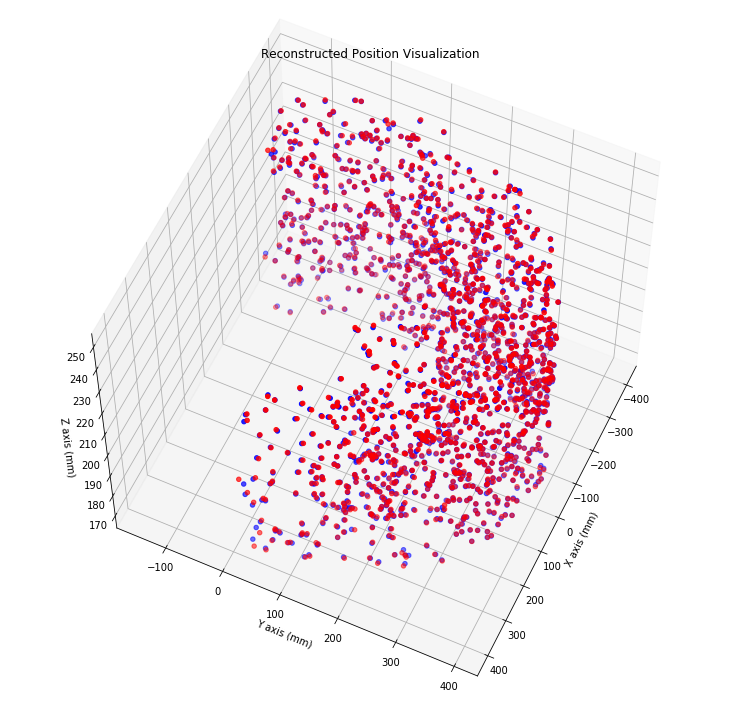

In [12]:
# Provide the filepath to test data, reconstructed data and figure saving    
test = np.array(pd.read_csv('data_test_4DoF_Quat.csv'))
reconstructed = np.array(pd.read_csv('all_Reconstruct_4DoF_Quat.csv'))
save_to_filepath = "4DoF_all_ann.pdf"

# Control the view of the figure
param1 = 60 
param2 = 25

# Plot the reconstructed points and save the related figure
vik.print_reconstruction(test, reconstructed, save_to_filepath, param1, param2)

In [23]:
# # Compute the errors
# Reload the files
desired = np.array(pd.read_csv('data_test_4DoF_RPY.csv'))
predicted = np.array(pd.read_csv('all_Reconstruct_4DoF_RPY.csv'))

desired_Quat = np.array(pd.read_csv('data_test_4DoF_Quat.csv'))
predicted_Quat = np.array(pd.read_csv('all_Reconstruct_4DoF_Quat.csv'))

mse_theta1, min_mse_theta1, max_mse_theta1 = vik.error_analysis_joint(desired[:,6], predicted[:,6], 'theta_1')
mse_theta2, min_mse_theta2, max_mse_theta2 = vik.error_analysis_joint(desired[:,7], predicted[:,7], 'theta_2')
mse_d3, min_mse_d3, max_mse_d3 = vik.error_analysis_joint(desired[:,8], predicted[:,8], 'd_3')         
mse_theta4, min_mse_theta4, max_mse_theta4  = vik.error_analysis_joint(desired[:,9], predicted[:,9], 'theta_4')

mse_X, min_mse_X, max_mse_X  = vik.error_analysis_joint(desired[:,0], predicted[:,0], 'X')
mse_Y, min_mse_Y, max_mse_Y  = vik.error_analysis_joint(desired[:,1], predicted[:,1], 'Y')
mse_Z, min_mse_Z, max_mse_Z  = vik.error_analysis_joint(desired[:,2], predicted[:,2], 'Z')


mean-squared-error (mse) analysis

min_index 890
max_index 438

min_theta_1 = 7.719e-12
max_theta_1 = 3.014e-4
mse_theta_1 = 6.742e-6

mean-absolute-error (mae) analysis
mae_theta_1 = 5.568e-4
----------------------------------------------

mean-squared-error (mse) analysis

min_index 564
max_index 438

min_theta_2 = 8.648e-13
max_theta_2 = 1.784e-3
mse_theta_2 = 3.651e-5

mean-absolute-error (mae) analysis
mae_theta_2 = 1.144e-3
----------------------------------------------

mean-squared-error (mse) analysis

min_index 1140
max_index 935

min_d_3 = 5.166e-14
max_d_3 = 1.131e-6
mse_d_3 = 1.414e-8

mean-absolute-error (mae) analysis
mae_d_3 = 2.758e-5
----------------------------------------------

mean-squared-error (mse) analysis

min_index 428
max_index 375

min_theta_4 = 6.889e-13
max_theta_4 = 2.881e-3
mse_theta_4 = 2.175e-5

mean-absolute-error (mae) analysis
mae_theta_4 = 9.322e-4
----------------------------------------------

mean-squared-error (mse) analysis

min_index 1398


In [14]:
# Compare the two results

desired = np.asarray(pd.read_csv('data_test_4DoF_Quat.csv'))
predicted = np.asarray(pd.read_csv('all_Reconstruct_4DoF_Quat.csv'))
save_to_file = 'pose_errors_ann.csv'

vik.get_pose_error_4DoF(desired, predicted, save_to_file)

1500 samples will be evaluated
Samples already evaluated --- 0

for 1 htm_desired is 
[[ 9.81238462e-01  1.92798032e-01  4.68770567e-17  3.72614964e-01]
 [ 1.92798032e-01 -9.81238462e-01 -1.13137701e-16  1.45313128e-01]
 [ 2.41848449e-17  1.20052868e-16 -1.00000000e+00  2.18308409e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]: 

for 1 htm_predicted is 
[[0.982482011473155 0.186357444529763 4.90058347691238e-17
  0.373156562123900]
 [0.186357444529763 -0.982482011473155 -1.12232018538383e-16
  0.143392552294491]
 [2.72320789486599e-17 1.19398541459904e-16 -1.00000000000000
  0.218257827000000]
 [0 0 0 1]]: 

for 1 htm_predict_inv is 
[[ 9.82482011e-01  1.86357445e-01  2.72320789e-17 -3.93341879e-01]
 [ 1.86357445e-01 -9.82482011e-01  1.19398541e-16  7.13400999e-02]
 [ 4.90058348e-17 -1.12232019e-16 -1.00000000e+00  2.18257827e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]: 

for 1 error_mat is 
[[ 9.99978486e-01  6.55950588e-03 -2.260

In [24]:
# Load the file
error = np.array(pd.read_csv('pose_errors_ann.csv'))

mse_X, min_mse_X, max_mse_X = vik.error_analysis_pose(error[:,0], 'X')
mse_Y, min_mse_Y, max_mse_Y = vik.error_analysis_pose(error[:,1], 'Y')
mse_Z, min_mse_Z, max_mse_Z = vik.error_analysis_pose(error[:,2], 'Z')
mse_roll, min_mse_roll, max_mse_roll = vik.error_analysis_pose(error[:,3], 'Roll')
mse_pitch, min_mse_pitch, max_mse_pitch = vik.error_analysis_pose(error[:,4], 'Pitch')
mse_yaw, min_mse_yaw, max_mse_yaw = vik.error_analysis_pose(error[:,5], 'Yaw')


min_index 1398
max_index 1435

min_X = 1.822e-13
max_X = 2.125e-6
mse_X = 1.323e-7
----------------------------------------------

min_index 1097
max_index 375

min_Y = 6.376e-14
max_Y = 6.275e-6
mse_Y = 1.470e-7
----------------------------------------------

min_index 1140
max_index 935

min_Z = 5.166e-14
max_Z = 1.131e-6
mse_Z = 1.414e-8
----------------------------------------------

min_index 1428
max_index 375

min_Roll = 4.184e-11
max_Roll = 3.111e-3
mse_Roll = 1.103e-5
----------------------------------------------

min_index 33
max_index 1399

min_Pitch = 3.620e-49
max_Pitch = 8.565e-36
mse_Pitch = 1.284e-37
----------------------------------------------

min_index 14
max_index 438

min_Yaw = 7.178e-45
max_Yaw = 9.278e-36
mse_Yaw = 1.273e-37
----------------------------------------------


In [16]:
# Save the overall mse
report_mse = []
report_mse.append([mse_theta1, min_mse_theta1, max_mse_theta1])
report_mse.append([mse_theta2, min_mse_theta2, max_mse_theta2])
report_mse.append([mse_d3, min_mse_d3, max_mse_d3])
report_mse.append([mse_theta4, min_mse_theta4, max_mse_theta4])
report_mse.append([mse_X, min_mse_X, max_mse_X])
report_mse.append([mse_Y, min_mse_Y, max_mse_Y])
report_mse.append([mse_Z, min_mse_Z, max_mse_Z])
report_mse.append([mse_roll, min_mse_roll, max_mse_roll])
report_mse.append([mse_pitch, min_mse_pitch, max_mse_pitch])
report_mse.append([mse_yaw, min_mse_yaw, max_mse_yaw])

headers = ['mse', 'min_mse', 'max_mse']

with open('report_mse.csv', "w") as outcsv_1:
    writer = csv.writer(outcsv_1, lineterminator='\n')
    writer.writerow([g for g in headers])
    writer.writerows(report_mse)

### ANFIS Analysis

In [17]:
predicted = np.array(pd.read_csv('Predicted_4DoF_fnn.csv'))
save_to_file_Quat = 'Fnn_Reconstruct_4DoF_Quat.csv'
save_to_file_RPY = 'Fnn_Reconstruct_4DoF_RPY.csv'
    
predicted[:,2] = predicted[:,2] * 10

# Reconstruction using forward kinematics
reconstructed_XYZ = vik.forward_kinematics_4DoF(predicted, save_to_file_Quat, save_to_file_RPY, option1 = 'reconstruction')

1500 samples will be generated
Samples already created --- 0
Samples already created --- 500
Samples already created --- 1000

Dataset generated

Dataset saved
4 DoF data generation terminated in --- 86.20219850540161 seconds ---


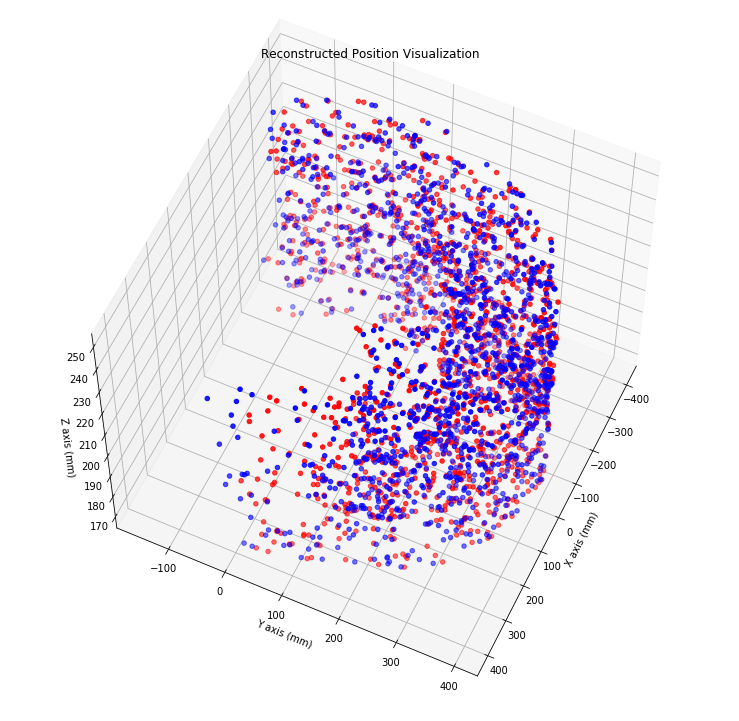

In [18]:
# Provide the filepath to test data, reconstructed data and figure saving    
test = np.array(pd.read_csv('data_test_4DoF_RPY.csv'))
reconstructed = np.array(pd.read_csv('Fnn_Reconstruct_4DoF_RPY.csv'))

save_to_filepath = "4DoF_fnn_recons_fig.pdf"


# Plot the reconstructed points and save the related figure
vik.print_reconstruction(test, reconstructed, save_to_filepath, param1 = 60, param2 = 25)

In [5]:
# # Compute the errors
# Reload the files
desired = np.array(pd.read_csv('data_test_4DoF_RPY.csv'))
predicted = np.array(pd.read_csv('Fnn_Reconstruct_4DoF_RPY.csv'))

desired_Quat = np.array(pd.read_csv('data_test_4DoF_Quat.csv'))
predicted_Quat = np.array(pd.read_csv('Fnn_Reconstruct_4DoF_RPY.csv'))

mse_theta1, min_mse_theta1, max_mse_theta1 = vik.error_analysis_joint(desired[:,6], predicted[:,6], 'theta_1')
mse_theta2, min_mse_theta2, max_mse_theta2 = vik.error_analysis_joint(desired[:,7], predicted[:,7], 'theta_2')
mse_d3, min_mse_d3, max_mse_d3 = vik.error_analysis_joint(desired[:,8], predicted[:,8], 'd_3')         
mse_theta4, min_mse_theta4, max_mse_theta4  = vik.error_analysis_joint(desired[:,9], predicted[:,9], 'theta_4')

mse_X, min_mse_X, max_mse_X  = vik.error_analysis_joint(desired[:,0], predicted[:,0], 'X')
mse_Y, min_mse_Y, max_mse_Y  = vik.error_analysis_joint(desired[:,1], predicted[:,1], 'Y')
mse_Z, min_mse_Z, max_mse_Z  = vik.error_analysis_joint(desired[:,2], predicted[:,2], 'Z')

# Find median value

print('\n\nmedian value theta1:')
diff = desired[:,6] - predicted[:,6]  
error = np.power(diff, 2)
median_theta1 = np.median(error)
print(median_theta1)

print('\n\nmedian value theta2:')
diff = desired[:,7] - predicted[:,7]  
error = np.power(diff, 2)
median_theta2 = np.median(error)
print(median_theta2)

print('\n\nmedian value d3:')
diff = desired[:,8] - predicted[:,8]  
error = np.power(diff, 2)
median_d3 = np.median(error)
print(median_d3)

print('\n\nmedian value theta4:')
diff = desired[:,9] - predicted[:,9]  
error = np.power(diff, 2)
median_theta4 = np.median(error)
print(median_theta4)


mean-squared-error (mse) analysis

min_index 220
max_index 728

min_theta_1 = 7.164e-9
max_theta_1 = 5.206e-2
mse_theta_1 = 1.560e-3

mean-absolute-error (mae) analysis
mae_theta_1 = 2.876e-2
----------------------------------------------

mean-squared-error (mse) analysis

min_index 971
max_index 1113

min_theta_2 = 6.264e-9
max_theta_2 = 5.108e-2
mse_theta_2 = 3.020e-3

mean-absolute-error (mae) analysis
mae_theta_2 = 4.341e-2
----------------------------------------------

mean-squared-error (mse) analysis

min_index 734
max_index 421

min_d_3 = 3.825e-21
max_d_3 = 2.545e-13
mse_d_3 = 7.507e-14

mean-absolute-error (mae) analysis
mae_d_3 = 2.264e-7
----------------------------------------------

mean-squared-error (mse) analysis

min_index 461
max_index 1223

min_theta_4 = 1.251e-9
max_theta_4 = 5.582e-2
mse_theta_4 = 3.241e-3

mean-absolute-error (mae) analysis
mae_theta_4 = 4.395e-2
----------------------------------------------

mean-squared-error (mse) analysis

min_index 279
m

In [21]:
# Compare the two results

desired = np.array(pd.read_csv('data_test_4DoF_Quat.csv'))
predicted = np.array(pd.read_csv('Fnn_Reconstruct_4DoF_Quat.csv'))
save_to_file = 'pose_errors_fnn.csv'
errors = []

vik.get_pose_error_4DoF(desired, predicted, save_to_file)

1500 samples will be evaluated
Samples already evaluated --- 0

for 1 htm_desired is 
[[ 9.81238462e-01  1.92798032e-01  4.68770567e-17  3.72614964e-01]
 [ 1.92798032e-01 -9.81238462e-01 -1.13137701e-16  1.45313128e-01]
 [ 2.41848449e-17  1.20052868e-16 -1.00000000e+00  2.18308409e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]: 

for 1 htm_predicted is 
[[0.996049220986680 0.0888028680382955 5.00022191460328e-17
  0.379640589775164]
 [0.0888028680382955 -0.996049220986680 -1.11791662958785e-16
  0.121163353526759]
 [3.98772511345006e-17 1.15790339271351e-16 -1.00000000000000
  0.218308000000000]
 [0 0 0 1]]: 

for 1 htm_predict_inv is 
[[ 9.96049221e-01  8.88028680e-02  3.98772511e-17 -3.88900367e-01]
 [ 8.88028680e-02 -9.96049221e-01  1.15790339e-16  8.69714907e-02]
 [ 5.00022191e-17 -1.11791663e-16 -1.00000000e+00  2.18308000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]: 

for 1 error_mat is 
[[ 9.94482824e-01  1.04899540e-01 -3.2

In [22]:
# Load the file
error = np.array(pd.read_csv('pose_errors_fnn.csv'))

mse_X, min_mse_X, max_mse_X = vik.error_analysis_pose(error[:,0], 'X')
mse_Y, min_mse_Y, max_mse_Y = vik.error_analysis_pose(error[:,1], 'Y')
mse_Z, min_mse_Z, max_mse_Z = vik.error_analysis_pose(error[:,2], 'Z')
mse_roll, min_mse_roll, max_mse_roll = vik.error_analysis_pose(error[:,3], 'Roll')
mse_pitch, min_mse_pitch, max_mse_pitch = vik.error_analysis_pose(error[:,4], 'Pitch')
mse_yaw, min_mse_yaw, max_mse_yaw = vik.error_analysis_pose(error[:,5], 'Yaw')


min_index 279
max_index 1134

min_X = 8.741e-12
max_X = 2.522e-4
mse_X = 7.216e-6
----------------------------------------------

min_index 997
max_index 904

min_Y = 8.133e-16
max_Y = 4.766e-4
mse_Y = 9.965e-6
----------------------------------------------

min_index 734
max_index 421

min_Z = 3.825e-22
max_Z = 2.545e-14
mse_Z = 7.507e-15
----------------------------------------------

min_index 578
max_index 1223

min_Roll = 1.709e-12
max_Roll = 1.076e-2
mse_Roll = 6.695e-4
----------------------------------------------

min_index 476
max_index 824

min_Pitch = 4.829e-45
max_Pitch = 3.809e-35
mse_Pitch = 2.049e-36
----------------------------------------------

min_index 102
max_index 1042

min_Yaw = 9.253e-44
max_Yaw = 6.470e-35
mse_Yaw = 2.147e-36
----------------------------------------------


In [23]:
# Save the overall mse
report_mse = []
report_mse.append([mse_theta1, min_mse_theta1, max_mse_theta1])
report_mse.append([mse_theta2, min_mse_theta2, max_mse_theta2])
report_mse.append([mse_d3, min_mse_d3, max_mse_d3])
report_mse.append([mse_theta4, min_mse_theta4, max_mse_theta4])
report_mse.append([mse_X, min_mse_X, max_mse_X])
report_mse.append([mse_Y, min_mse_Y, max_mse_Y])
report_mse.append([mse_Z, min_mse_Z, max_mse_Z])
report_mse.append([mse_roll, min_mse_roll, max_mse_roll])
report_mse.append([mse_pitch, min_mse_pitch, max_mse_pitch])
report_mse.append([mse_yaw, min_mse_yaw, max_mse_yaw])

headers = ['mse', 'min_mse', 'max_mse']

with open('report_mse_fnn.csv', "w") as outcsv_1:
    writer = csv.writer(outcsv_1, lineterminator='\n')
    writer.writerow([g for g in headers])
    writer.writerows(report_mse)